In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Importing the dataset into relevant matrices and vectors
dataset = pd.read_csv('Dataset.csv')
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Splitting the dataset into the Predictors (LIMIT_BAL, SEX, EDUCATION, etc) and Output (y)
X = dataset.iloc[:, 1:24].values
y = dataset.iloc[:, 24].values
dataset.iloc[:, 1:24].head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
# Scalling the data

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)



In [ ]:
# Model Fitting - LR,  Decision Tree, Bagging, and Random Forests

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter = 500)
lr_classifier.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt_classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
bag_classifier = RandomForestClassifier(n_estimators=50, max_depth=5, bootstrap=True, max_features = None)
bag_classifier.fit(X_train, y_train)

rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=5, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred1 = lr_classifier.predict(X_test)
y_pred2 = dt_classifier.predict(X_test)
y_pred3 = bag_classifier.predict(X_test)
y_pred4 = rf_classifier.predict(X_test)

In [ ]:
# Finding the model's accuracy
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy4 = accuracy_score(y_test, y_pred4)

print("Logistic Regression Accuracy: " + str(accuracy1))
print("Decision Tree Accuracy: " + str(accuracy2))
print("Bagging Accuracy: " + str(accuracy3))
print("Random Forest Accuracy: " + str(accuracy4))

Logistic Regression Accuracy: 0.812
Decision Tree Accuracy: 0.8197777777777778
Bagging Accuracy: 0.822
Random Forest Accuracy: 0.8193333333333334


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)
cm4 = confusion_matrix(y_test, y_pred4)
print("Confusion Matrices:")
print("Logistic Regression")
print(cm1)
print("Decision Tree")
print(cm2)
print("Bagging")
print(cm3)
print("Random Forest")
print(cm4)
print("F1 Scores")
print(f1_score(y_test, y_pred1))
print(f1_score(y_test, y_pred2))
print(f1_score(y_test, y_pred3))
print(f1_score(y_test, y_pred4))



Confusion Matrices:
Logistic Regression
[[6848  166]
 [1526  460]]
Decision Tree
[[6730  284]
 [1338  648]]
Bagging
[[6706  308]
 [1294  692]]
Random Forest
[[6760  254]
 [1372  614]]
F1 Scores
0.35222052067381315
0.4441398217957505
0.46349631614199605
0.4302733006306938


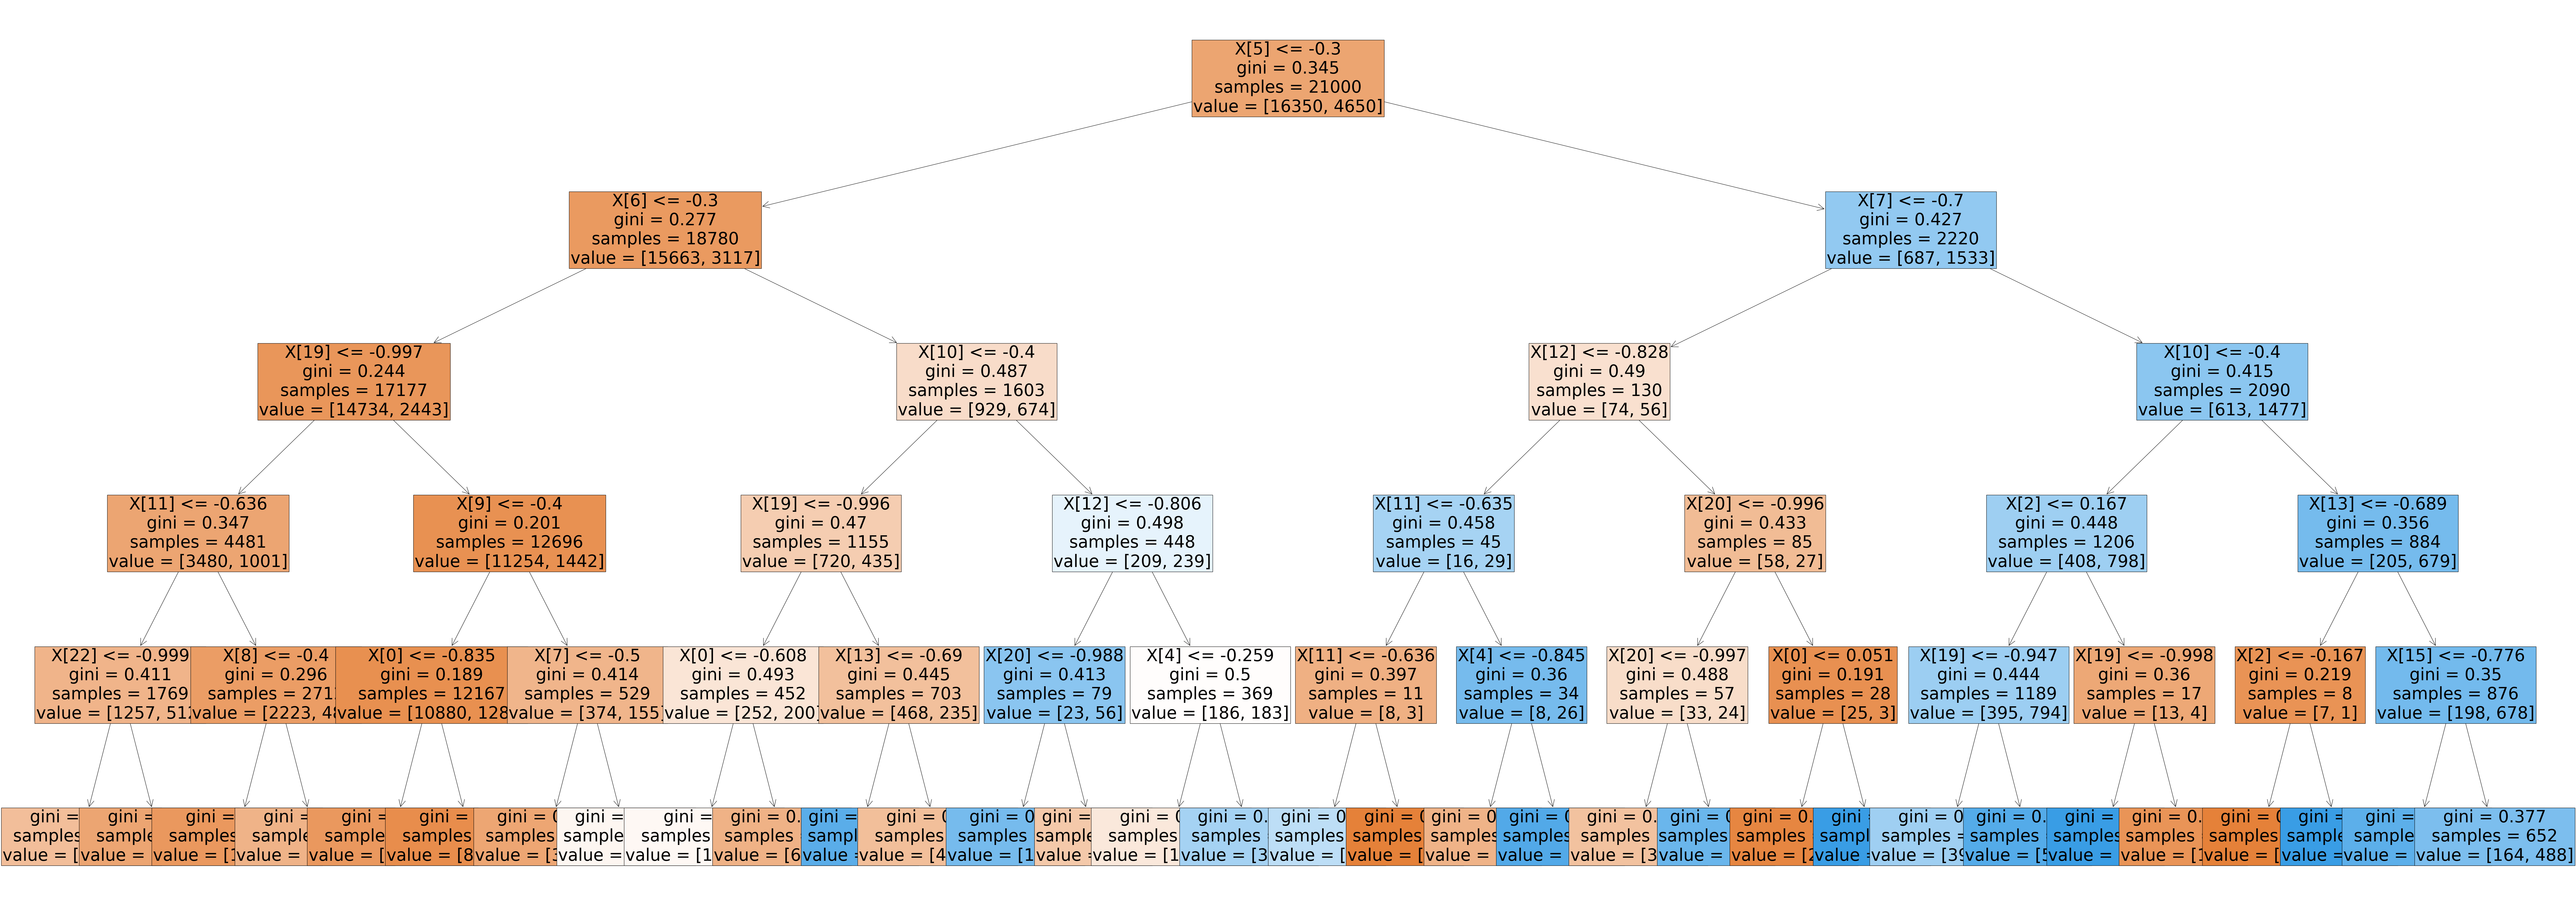

In [ ]:
# Visualizing Decision Tree
from sklearn.tree import plot_tree
plt.figure(num=None, figsize=(128, 48), dpi=100, facecolor='w', edgecolor='k')
plot_tree(dt_classifier, filled= True,fontsize = 48)
plt.show()